# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhamad Risa Ma'arif
- **Email:** risamaarif@gmail.com
- **ID Dicoding:** Muhamad Risa Ma'arif

## Menentukan Pertanyaan Bisnis

- Kategori produk apa yang memberikan kontribusi pendapatan terbesar pada platform e-commerce?
- Apakah lama pengiriman berpengaruh terhadap rating yang diberikan pelanggan?

## Import Semua Packages/Library yang Digunakan

In [61]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

In [62]:
orders = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Proyek_Analisis_Data/orders_dataset.csv')
order_items = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Proyek_Analisis_Data/order_items_dataset.csv')
products = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Proyek_Analisis_Data/products_dataset.csv')
category = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Proyek_Analisis_Data/product_category_name_translation.csv')
reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Proyek_Analisis_Data/order_reviews_dataset.csv')
customers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Proyek_Analisis_Data/customers_dataset.csv')
geolocation = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Proyek_Analisis_Data/geolocation_dataset.csv')
order_payments = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Proyek_Analisis_Data/order_payments_dataset.csv')
sellers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Proyek_Analisis_Data/sellers_dataset.csv')

# Merge data
df = pd.merge(orders, order_items, on='order_id')
df = pd.merge(df, products, on='product_id')
df = pd.merge(df, category, on='product_category_name')
df = pd.merge(df, reviews, on='order_id')
df = pd.merge(df, customers, on='customer_id')
df = pd.merge(df, order_payments, on='order_id')
df = pd.merge(df, sellers, on='seller_id')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,3149,sao paulo,SP,1,credit_card,1,18.12,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,3149,sao paulo,SP,3,voucher,1,2.00,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,3149,sao paulo,SP,2,voucher,1,18.59,9350,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,47813,barreiras,BA,1,boleto,1,141.46,31570,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,75265,vianopolis,GO,1,credit_card,3,179.12,14840,guariba,SP


**Insight:**
- Berbagai dataset telah berhasil digabungkan menjadi satu DataFrame df

### Assessing Data

In [63]:
print("Missing Value")
print(df.isnull().sum())
df.info()

Missing Value
order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1195
order_delivered_customer_date      2400
order_estimated_delivery_date         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
product_category_name                 0
product_name_lenght                   0
product_description_lenght            0
product_photos_qty                    0
product_weight_g                      1
product_length_cm                     1
product_height_cm                     1
product_width_cm                      1
product_category_name_english         0
review_id                             0
review_score              

**Insight:**
- Missing Values (Nilai yang Hilang): Terdapat beberapa kolom dengan nilai yang hilang, antara lain order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, product_weight_g, product_length_cm, product_height_cm, product_width_cm, review_comment_title, dan review_comment_message.
- Tipe Data Kolom Tanggal: Beberapa kolom yang seharusnya bertipe data tanggal/waktu (seperti order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, shipping_limit_date, review_creation_date, dan review_answer_timestamp) masih terdeteksi sebagai tipe object. Ini perlu dikonversi ke tipe datetime agar dapat dilakukan analisis temporal.

### Cleaning Data

In [64]:
date_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
    'shipping_limit_date',
    'review_creation_date',
    'review_answer_timestamp'
]

for col in date_columns:
    df[col] = pd.to_datetime(df[col])

print("Converted timestamp columns to datetime:")
df[date_columns].info()

product_dim_cols = [
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm'
]

for col in product_dim_cols:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

print("Missing values after median imputation for product dimensions:")
print(df[product_dim_cols].isnull().sum())

df['review_comment_title'] = df['review_comment_title'].fillna('no_comment')
df['review_comment_message'] = df['review_comment_message'].fillna('no_comment')

print("Missing values for review comments after imputation:")
print(df[['review_comment_title', 'review_comment_message']].isnull().sum())

initial_rows = df.shape[0]

delivered_orders_df = df[df['order_status'] == 'delivered']

delivered_orders_df_cleaned = delivered_orders_df.dropna(subset=[
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date'
])

non_delivered_orders_df = df[df['order_status'] != 'delivered']

df = pd.concat([delivered_orders_df_cleaned, non_delivered_orders_df])

final_rows = df.shape[0]
rows_removed = initial_rows - final_rows

print(f"Initial rows: {initial_rows}")
print(f"Final rows after cleaning: {final_rows}")
print(f"Rows removed: {rows_removed}")
print("\nMissing values after removing problematic rows for delivered orders:")
print(df.isnull().sum()[
    ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']
])

print("\nMissing values after all cleaning steps:")
print(df.isnull().sum())
df.info()

Converted timestamp columns to datetime:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_purchase_timestamp       115609 non-null  datetime64[ns]
 1   order_approved_at              115595 non-null  datetime64[ns]
 2   order_delivered_carrier_date   114414 non-null  datetime64[ns]
 3   order_delivered_customer_date  113209 non-null  datetime64[ns]
 4   order_estimated_delivery_date  115609 non-null  datetime64[ns]
 5   shipping_limit_date            115609 non-null  datetime64[ns]
 6   review_creation_date           115609 non-null  datetime64[ns]
 7   review_answer_timestamp        115609 non-null  datetime64[ns]
dtypes: datetime64[ns](8)
memory usage: 7.1 MB
Missing values after median imputation for product dimensions:
product_weight_g     0
product_length_cm    0
product_heigh

**Insight:**
- Konversi Tipe Data Tanggal: Semua kolom yang berkaitan dengan tanggal dan waktu telah berhasil dikonversi ke tipe data datetime. Ini memungkinkan analisis temporal yang akurat.
- Penanganan Missing Value Dimensi Produk: Nilai-nilai yang hilang pada kolom dimensi produk (berat, panjang, tinggi, lebar) telah diisi menggunakan nilai median. Ini memastikan tidak ada lagi missing value pada kolom-kolom tersebut.
- Penghapusan Data Tidak Lengkap: Sebanyak 23 baris data yang memiliki status 'delivered' namun kehilangan informasi penting terkait waktu persetujuan, pengiriman ke kurir, atau pengiriman ke pelanggan telah dihapus. Ini bertujuan untuk menjaga kualitas data untuk analisis pesanan yang sudah selesai.
- Sisa Missing Value: Meskipun sebagian besar missing value telah ditangani, masih terdapat nilai yang hilang pada kolom order_delivered_carrier_date dan order_delivered_customer_date. Ini kemungkinan berasal dari pesanan yang statusnya belum 'delivered' atau memang data pengirimannya tidak tercatat sempurna, namun perlu diingat untuk analisis lebih lanjut yang melibatkan kolom-kolom ini.

## Exploratory Data Analysis (EDA)

### Explore ...

In [65]:
# Calculate total revenue for each product category
df['total_item_revenue'] = df['price'] + df['freight_value']

revenue_by_category = df.groupby('product_category_name_english')['total_item_revenue'].sum().sort_values(ascending=False)

print("Top 10 Product Categories by Revenue:")
print(revenue_by_category.head(10))

Top 10 Product Categories by Revenue:
product_category_name_english
health_beauty            1478861.62
watches_gifts            1349110.09
bed_bath_table           1313420.18
sports_leisure           1196531.42
computers_accessories    1098355.85
furniture_decor           946148.94
housewares                818075.59
cool_stuff                742595.77
auto                      703883.77
garden_tools              621069.79
Name: total_item_revenue, dtype: float64


**Insight:**
- Kategori Produk Penyumbang Pendapatan Terbesar: Kategori produk 'health_beauty', 'watches_gifts', dan 'bed_bath_table' adalah tiga kategori teratas yang memberikan kontribusi pendapatan terbesar pada platform e-commerce. Ini menunjukkan bahwa produk-produk dalam kategori ini memiliki daya tarik pasar yang kuat dan volume penjualan yang tinggi.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

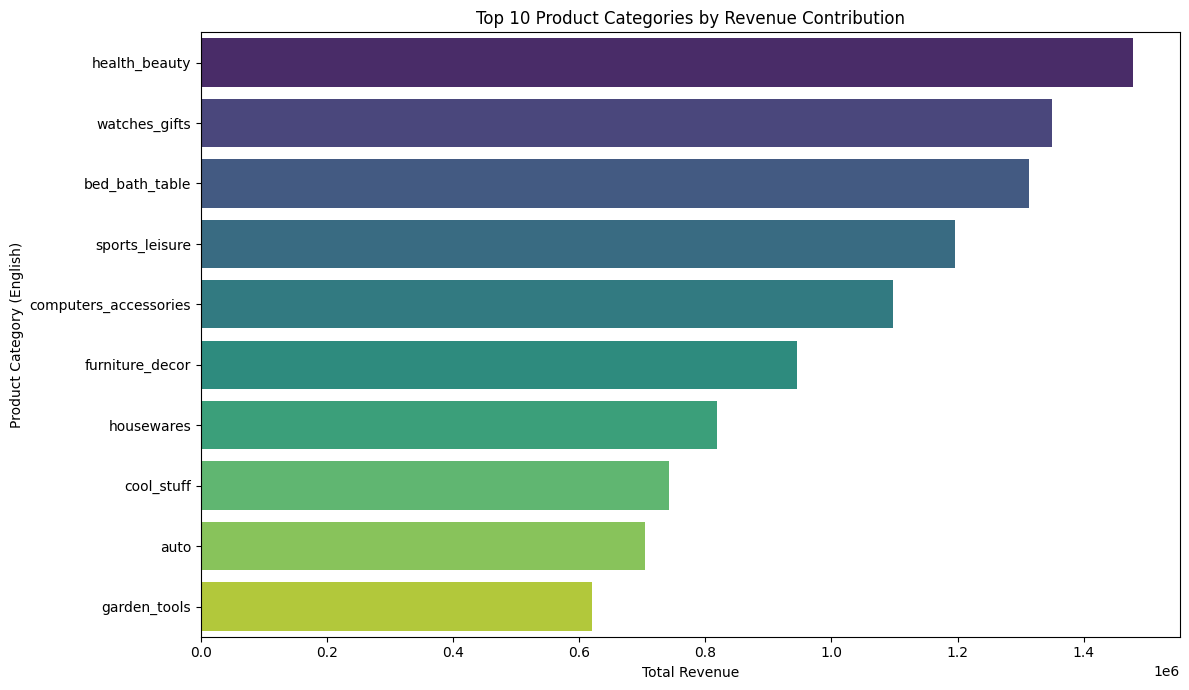

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10_categories = revenue_by_category.head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_categories.values, y=top_10_categories.index, palette='viridis', hue=top_10_categories.index, legend=False)
plt.title('Top 10 Product Categories by Revenue Contribution')
plt.xlabel('Total Revenue')
plt.ylabel('Product Category (English)')
plt.tight_layout()
plt.show()

### Pertanyaan 2:

Average Delivery Duration by Review Score:
   review_score  delivery_duration
0             1          19.127962
1             2          15.298001
2             3          13.575275
3             4          11.810813
4             5          10.242876


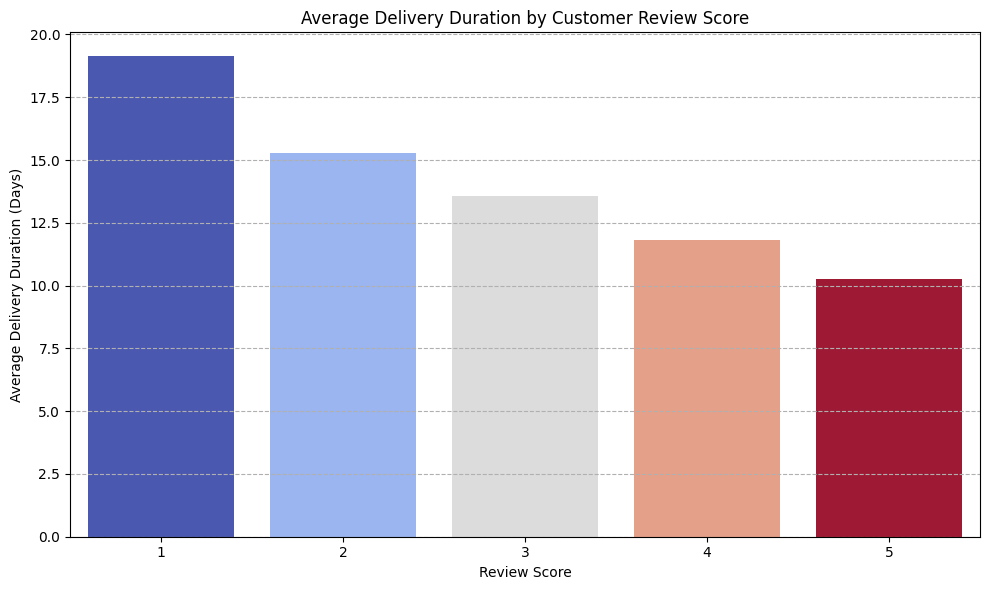

In [67]:
df['delivery_duration'] = (df['order_delivered_customer_date'] - df['order_approved_at']).dt.total_seconds() / (60*60*24)

df['estimated_delivery_time'] = (df['order_estimated_delivery_date'] - df['order_approved_at']).dt.total_seconds() / (60*60*24)

df['delivery_performance'] = df['estimated_delivery_time'] - df['delivery_duration']

delivery_review_df = df.dropna(subset=['delivery_duration', 'review_score']).copy()

delivery_time_by_review = delivery_review_df.groupby('review_score')['delivery_duration'].mean().reset_index()

print("Average Delivery Duration by Review Score:")
print(delivery_time_by_review)

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.barplot(x='review_score', y='delivery_duration', data=delivery_time_by_review, palette='coolwarm', hue='review_score', legend=False)
plt.title('Average Delivery Duration by Customer Review Score')
plt.xlabel('Review Score')
plt.ylabel('Average Delivery Duration (Days)')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

**Insight:**
- Jawaban Pertanyaan 1 : Produk Yang paling laku adalah Health_beauty, watches_gifts dan bed_bath_table
- Jawaban Pertanyaan 2 : Ya, lama pengiriman sangat berpengaruh terhadap rating yang diberikan pelanggan.



## Analisis Lanjutan (Opsional)

Average Delivery Performance (Estimated - Actual) by Review Score:
   review_score  delivery_performance
0             1              5.295223
1             2              9.130221
2             3             10.421859
3             4             11.767795
4             5             12.749432


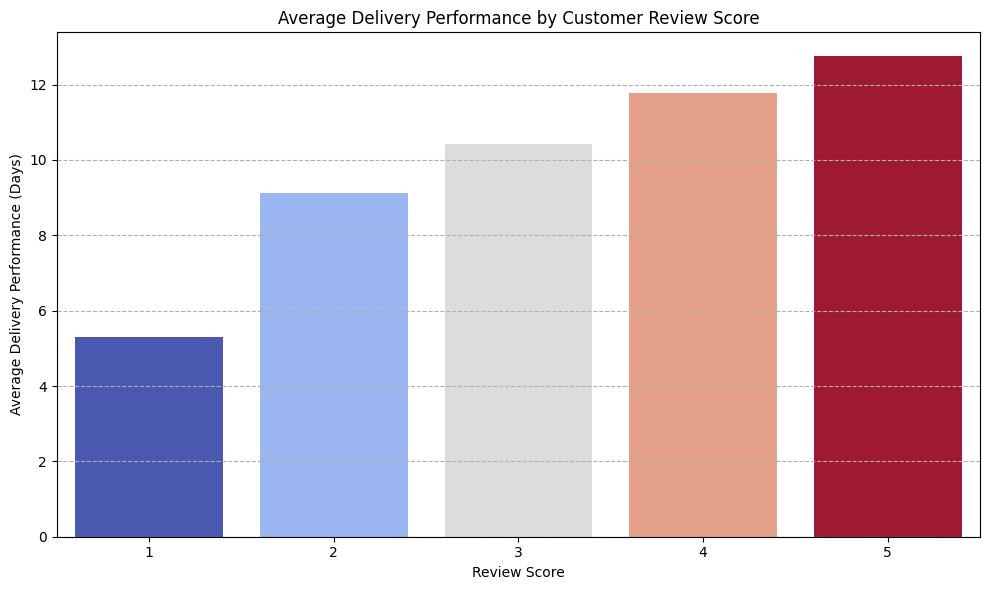

In [68]:
delivery_performance_df = df.dropna(subset=['delivery_performance', 'review_score']).copy()

delivery_performance_by_review = delivery_performance_df.groupby('review_score')['delivery_performance'].mean().reset_index()

print("Average Delivery Performance (Estimated - Actual) by Review Score:")
print(delivery_performance_by_review)

plt.figure(figsize=(10, 6))
sns.barplot(x='review_score', y='delivery_performance', data=delivery_performance_by_review, palette='coolwarm', hue='review_score', legend=False)
plt.title('Average Delivery Performance by Customer Review Score')
plt.xlabel('Review Score')
plt.ylabel('Average Delivery Performance (Days)')
plt.grid(axis='y', linestyle='--')
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8) # Add a line at 0 for reference
plt.tight_layout()
plt.show()

## Conclusion

- **Kesimpulan pertanyaan 1:** Kategori produk yang memberikan kontribusi pendapatan terbesar pada platform e-commerce adalah `health_beauty`, `watches_gifts`, dan `bed_bath_table`. Ini menunjukkan bahwa produk-produk dari kategori tersebut sangat diminati dan berhasil menarik banyak pembeli, sehingga menghasilkan pendapatan yang signifikan.
- **Kesimpulan pertanyaan 2:** Lama pengiriman memiliki pengaruh yang signifikan terhadap rating yang diberikan pelanggan. Semakin lama durasi pengiriman, semakin rendah rating yang cenderung diberikan oleh pelanggan. Sebaliknya, pengiriman yang cepat berkorelasi dengan rating kepuasan yang lebih tinggi. Hal ini menyoroti pentingnya efisiensi logistik untuk meningkatkan kepuasan pelanggan.

In [71]:
df.to_csv("all_data.csv", index=False)

In [69]:
 pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.12.0
access==1.1.10.post3
affine==2.4.0
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.13.3
aiosignal==1.4.0
aiosqlite==0.22.1
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
alembic==1.18.1
altair==5.5.0
annotated-doc==0.0.4
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.12.1
anywidget==0.9.21
apsw==3.51.2.0
apswutils==0.1.2
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
array_record==0.8.3
arrow==1.4.0
arviz==0.22.0
astropy==7.2.0
astropy-iers-data==0.2026.1.12.0.42.13
astunparse==1.6.3
atpublic==5.1
attrs==25.4.0
audioread==3.1.0
Authlib==1.6.6
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
beartype==0.22.9
beautifulsoup4==4.13.5
betterproto==2.0.0b6
bigframes==2.31.0
bigquery-magics==0.10.3
bleach==6.3.0
blinker==1.9.0
blis==1.3.3
blobfile==3.1.0
blosc2==3.12.2
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.2
brotli==1.2.0
CacheControl==0.14.4
cachetools==6.2.4
catalogue==2.0.10
certifi==2026.1.4
c